In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input

In [3]:
# Cargar dataset desde CSV
df = pd.read_csv(r'C:\Users\vicky\OneDrive\Documentos\Tesis\datos_robot_2gdlCD2.csv')
df

,x,y,theta1_grados,theta2_grados,theta1_radianes,theta2_radianes,x_check,y_check
0,0.549333,0.739628,30.516871,45.762591,0.532620,0.798708,0.549333,0.739628
1,-0.267329,0.807828,76.621528,63.378130,1.337298,1.106157,-0.267329,0.807828
2,-0.422403,0.555793,81.508859,91.451972,1.422598,1.596138,-0.422403,0.555793
3,0.549503,0.486286,-1.288707,85.592255,-0.022492,1.493867,0.549503,0.486286
4,-0.744217,0.562583,121.809250,42.207326,2.125972,0.736657,-0.744217,0.562583
...,...,...,...,...,...,...,...,...
39350,-0.554109,0.293802,100.908858,102.315027,1.761192,1.785734,-0.554109,0.293802
39351,0.191222,0.159363,-35.778741,151.172476,-0.624457,2.638457,0.191222,0.159363
39352,-0.528321,0.774814,103.973431,40.630826,1.814679,0.709142,-0.528321,0.774814
39353,-0.498550,-0.403980,-191.064672,100.165681,-3.334708,1.748221,-0.498550,-0.403980


In [5]:
#Extraer entradas (x, y) y salidas (theta1, theta2)
X = df[['x', 'y']].values  # Entradas (posiciones x, y)
Y = df[['theta1_radianes', 'theta2_radianes']].values  # Salidas (ángulos θ1, θ2)

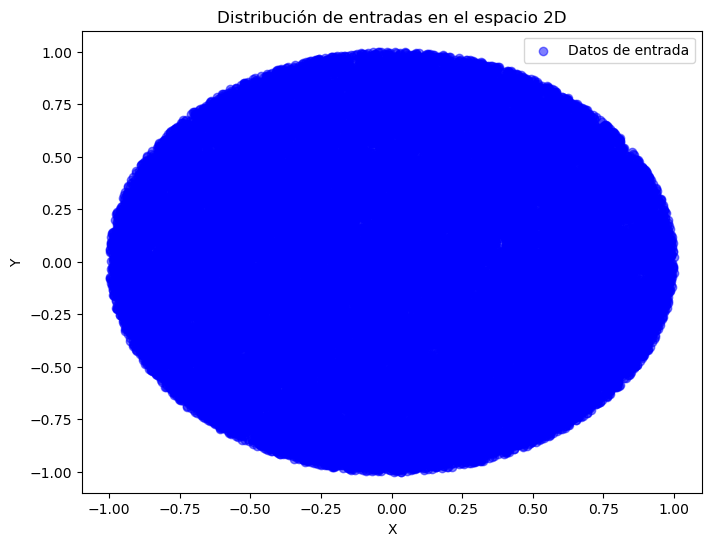

In [7]:
#Visualización de los datos
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o', alpha=0.5, label="Datos de entrada")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Distribución de entradas en el espacio 2D")
plt.legend()
plt.show()


In [9]:
# Separar datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)


In [11]:
#Definir el modelo de red neuronal
model = Sequential([
    Input(shape=(2,)),  # Entrada con dos valores (th1, th2)
    Dense(64, activation='relu'),
    Dense(64, activation='sigmoid'),
    Dense(2)  # Salida con dos valores (x, y)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Mostrar resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,482 (17.51 KB)

 Trainable params: 4,482 (17.51 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#Entrenar el modelo
#history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=1000, batch_size=32, verbose=1)

#Ealy Stopping
from tensorflow.keras.callbacks import EarlyStopping

#definimos secuencia  de ealy stopping
early_stop= EarlyStopping(
    monitor='val_loss',
    patience= 50,
    restore_best_weights= True,
    verbose=1
)
#Entrenar el modelo
history = model.fit(X_train, Y_train, epochs=1000,
                    batch_size=32,
                    validation_data=(X_test, Y_test),
                   callbacks=[early_stop])


Epoch 1/1000
984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.7374 - val_loss: 0.3418
Epoch 2/1000
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2227 - val_loss: 0.1426
Epoch 3/1000
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1234 - val_loss: 0.0887
Epoch 4/1000
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0832 - val_loss: 0.0612
Epoch 5/1000
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0617 - val_loss: 0.0447
Epoch 6/1000
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0493 - val_loss: 0.0352
Epoch 7/1000
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0407 - val_loss: 0.0298
Epoch 8/1000
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0345 - val_loss: 0.0244
Epoch 9/1000
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0306 - val_loss: 0.0219
Epoch 10/1000
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0265 - val_loss: 0.0177
Epoch 11/1000
984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0236 - val_loss: 0.0148
Epoch 12/1000
984/984 ━━━━━━━━

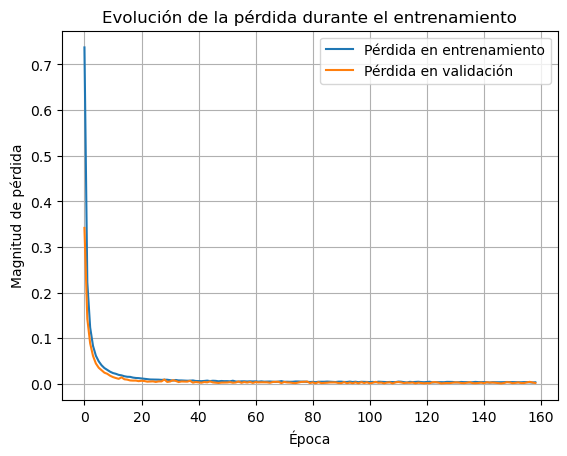

In [15]:
# Extraer historial de entrenamiento
hist = history.history
# Graficar la evolución de la pérdida durante el entrenamiento
plt.plot(history.history["loss"], label="Pérdida en entrenamiento")
plt.plot(history.history["val_loss"], label="Pérdida en validación")
plt.xlabel("Época")
plt.ylabel("Magnitud de pérdida")
plt.legend()
plt.title("Evolución de la pérdida durante el entrenamiento")
plt.grid(True)
plt.show()

246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step


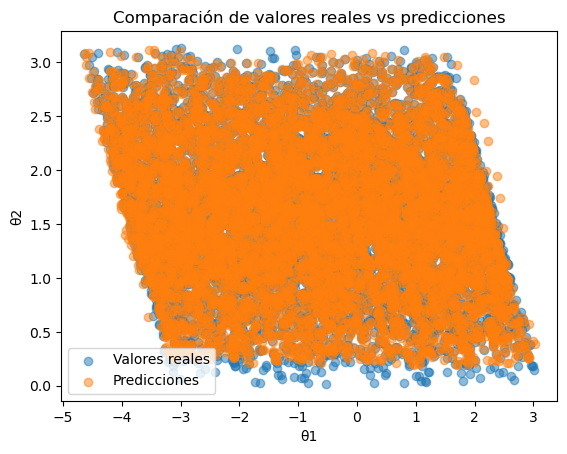

In [17]:
import matplotlib.pyplot as plt
import numpy as np

Y_pred = model.predict(X_test)

plt.scatter(Y_test[:, 0], Y_test[:, 1], label="Valores reales", alpha=0.5)
plt.scatter(Y_pred[:, 0], Y_pred[:, 1], label="Predicciones", alpha=0.5)
plt.legend()
plt.xlabel("θ1")
plt.ylabel("θ2")
plt.title("Comparación de valores reales vs predicciones")
plt.show()

In [19]:
Y_pred = model.predict(X_test)  # Generar predicciones
errores = np.abs(Y_test - Y_pred)
print("Errores promedio por cada salida:")
print(np.mean(errores, axis=0))  
#en grados: th1=0.7505, th2=0.9052

246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step
Errores promedio por cada salida:
[0.01185873 0.01407216]


In [21]:
# Predicciones con el modelo
Y_pred = model.predict(X_test)

# Calcular el R² Score entre las predicciones y los valores reales
r2 = r2_score(Y_test, Y_pred)

# Imprimir el R² Score
print(f"R² Score: {r2}")


246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
R² Score: 0.9993243089639552


In [23]:

# Prueba con nuevos valores de x, y
nuevas_entradas = np.array([[-0.0765, -0.0995]])  # Modifica este valor para probar
predicciones = model.predict(nuevas_entradas)
print(f"Predicción: th1 = {predicciones[0,0]:.4f}, th2 = {predicciones[0,1]:.4f}")
print("Ángulos predichos (th1, th2):", predicciones)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicción: th1 = -3.6255, th2 = 2.8809
Ángulos predichos (th1, th2): [[-3.6255264  2.8808563]]


In [45]:
# GUARDAR el modelo
import keras
keras.saving.save_model(model, 'CONTROLADORdef.keras')
